In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Read dataset and preprocess

In [10]:
# read data and preprocess(drop the row with 'null' value)
path = 'data/penguins.csv'
df = pd.read_csv(path).dropna()
df = df[df['sex'] != '.'] # There is a record whose sex=='.', which should be an error
# remove extreme values
# IQR
columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out extreme values
df = df[(df[columns] > lower_bound).all(axis=1) & (df[columns] < upper_bound).all(axis=1)]

# define X, y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# PCA

In [11]:
# PCA
from sklearn.decomposition import PCA
n_components = X_train.shape[1]
pca = PCA(n_components=n_components)
pcs = pca.fit_transform(X_train)

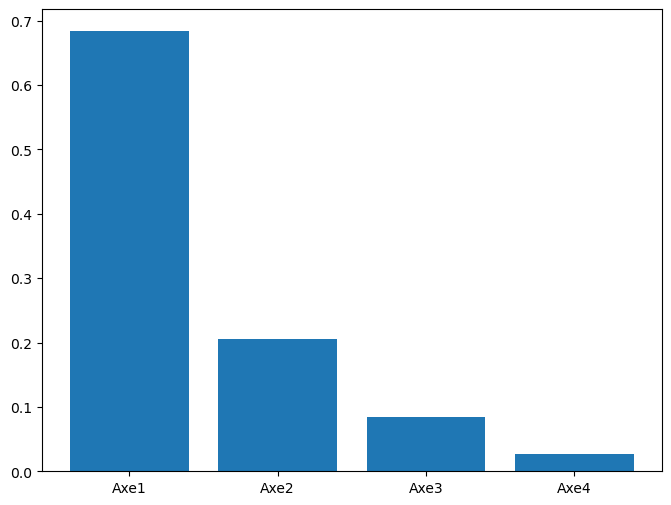

In [12]:
# plot the explained_variance_ratio of each components
plt.figure(figsize=(8, 6))
plt.bar([f"Axe{i}" for i in range(1, n_components+1)], pca.explained_variance_ratio_)
plt.show()

<Axes: >

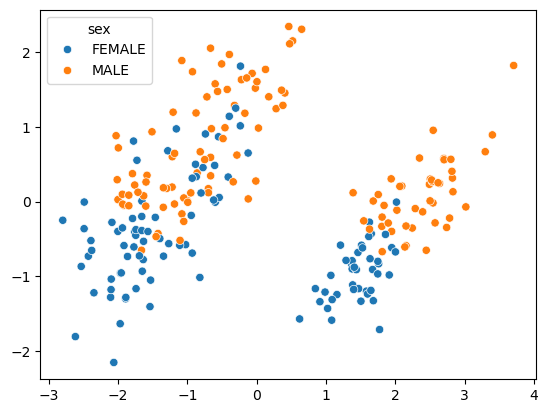

In [13]:
# plot the scatterplot, label it with y('sex' attribute)
sns.scatterplot(x=pcs[:,0],y=pcs[:,1], hue=y_train)

Clearly by using these two components we can easily separate these two classes.


# MDS

In [14]:
# MDS
from sklearn.manifold import MDS
n_components = 2
mds = MDS(n_components=n_components, dissimilarity='euclidean', random_state=42)
X_transformed = mds.fit_transform(X_train)


(array([4.89895997, 4.71753141, 0.74965586, ..., 2.58165246, 0.69765422,
        2.44151628]),
 array([4.97772688, 4.87761201, 0.27230124, ..., 2.4789397 , 0.75473627,
        2.12957332]))

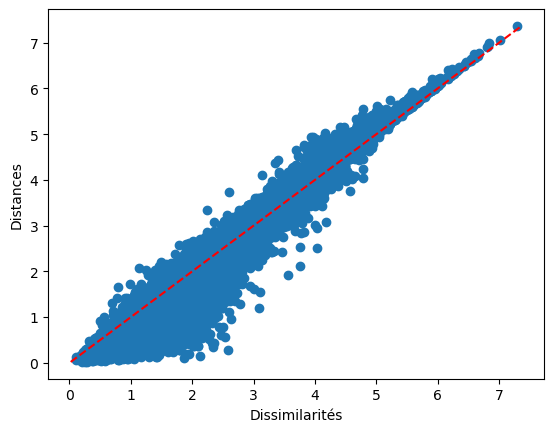

In [15]:
# draw the Shepard plot
from src.utils import plot_Shepard
plot_Shepard(mds)

<Axes: >

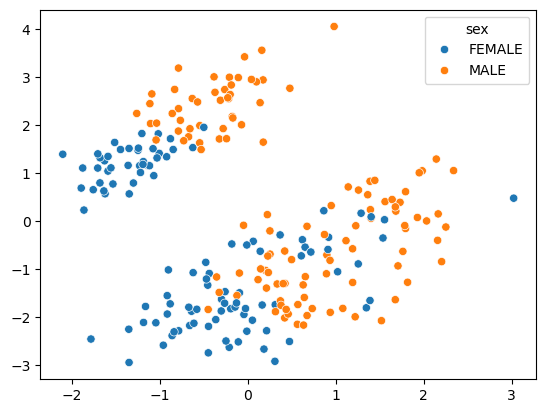

In [16]:
# plot the scatterplot, label it with y('sex' attribute)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1], hue=y_train)

Clearly by using these two components we can easily separate these two classes.

# AgglomerativeClustering

In [19]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2
pred_train = AgglomerativeClustering(n_clusters = n_clusters, metric='euclidean', linkage='complete').fit(X_train).labels_

<Axes: >

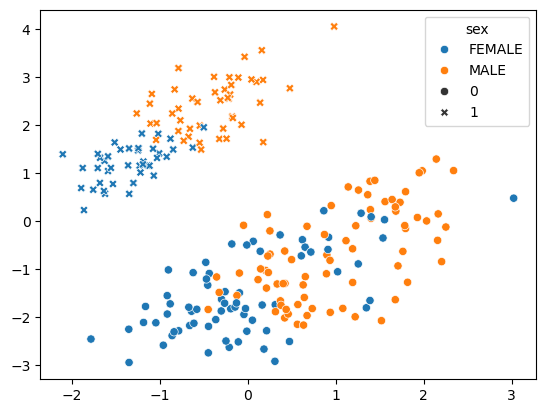

In [23]:
# plot the scatterplot, label it with y('sex' attribute)
sns.scatterplot(x=X_transformed[:,0],y=X_transformed[:,1], hue=y_train, style=pred_train)